# Softmax Regression으로 MNIST 데이터 분류하기

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn 
import matplotlib.pyplot as plt
import random

In [4]:
"""
USE_CUDA = torch.cuda.is_available() # GPU를 사용 가능하다면 True, 아니라면 False 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
"""
device = torch.device("mps")
print("다음 기기로 학습합니다", device)

다음 기기로 학습합니다 mps


In [5]:
random.seed(777)
torch.manual_seed(777)

In [6]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [7]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(), 
                          # 현재 data를 PyTorch 텐서로 바꿔줌. 
                          # 여기서는 0-255 값을 가지고 H(높이), W(너비), C(채널) 순서로 되어있는 '이미지'를 
                          # 0-1 값을 가지고 C H W 순서로 되어있는 PyTorch Tensor로 바꿔준다.
                          download=True)

mnist_test = dsets.MNIST(root="MNIST_data/",
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

85.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

12.5%

100.0%


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



112.7%

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Processing...
Done!



/Users/jungnerd/miniforge3/envs/mnist/lib/python3.9/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1660136169395/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Epoch / Batch size / Iteration  
- Epoch : 모든 training set에 대한 연산을 한 번 하면 1 epoch 

- Batch size : 모든 training set을 한 번에 학습시키면 memory가 부족할 수 있기 때문에 training set을 나눠서 학습시키게 되는데, 이 때 학습시키는 set의 크기를 batch size  

- Iteration : 1 epoch를 위해 몇 번의 batch size의 학습을 반복해야하는지  

__Example__ : if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.


In [8]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [9]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device) # to() 함수는 연산을 어디서 수행할지 정한다.

In [10]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [14]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print("Epoch:", "%04d" % (epoch + 1), "cost =", f'{avg_cost:.9f}')
    
print("Learning finished")

Epoch: 0001 cost = 0.272883594
Epoch: 0002 cost = 0.271629542
Epoch: 0003 cost = 0.270609707
Epoch: 0004 cost = 0.269294918
Epoch: 0005 cost = 0.268277287
Epoch: 0006 cost = 0.267255366
Epoch: 0007 cost = 0.266613394
Epoch: 0008 cost = 0.265661329
Epoch: 0009 cost = 0.264922291
Epoch: 0010 cost = 0.263888657
Epoch: 0011 cost = 0.263269722
Epoch: 0012 cost = 0.262586057
Epoch: 0013 cost = 0.261751622
Epoch: 0014 cost = 0.261135787
Epoch: 0015 cost = 0.260536849
Learning finished


## Model Test

Accuracy: 0.8704999685287476
Label:  0
Prediction:  0


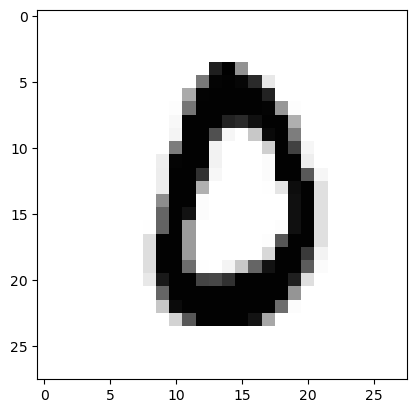

In [26]:
# Test data를 사용해서 모델을 테스트한다

with torch.no_grad(): # torch.no_grad()를 하면 gradient 연산을 수행하지 않는다
    X_test = mnist_test.test_data.view(-1, 28 * 28 ).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())
    
    # MNIST test data에서 무작위로 하나를 뽑아서 예측을  해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r: r + 1].to(device)
    
    print("Label: ", Y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap="Greys", interpolation="nearest")
    plt.show()